<h1>CSI3004: Data Science Programming - Lab Digital Assignment 2</h1>
<h2>V S G S Phaneendra B - 21MID0031</h2>

<h2> 1. Import Library</h2>

In [89]:
#21MID0031
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

<h2> 2. Data Collection and Pre-Processing

In [90]:
#21MID0031
df = pd.read_csv("Insurance.csv")

In [91]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


<h2> 3. Data Wrangling

In [92]:
#21MID0031
df.shape

(381109, 12)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [94]:
#21MID0031
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
df['Vehicle_Age'] = df['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace({'Yes':1,'No':0})

In [95]:
df.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [96]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [97]:
x = df.drop(columns='Response',axis=1) 
y = df['Response']

In [98]:
y 

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

<h2> 4. Data Visualisation

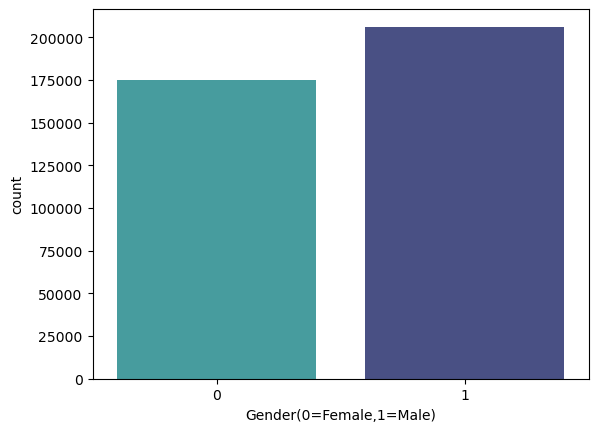

In [99]:
#21MID0031
sns.countplot(x ='Gender',data = df,palette = "mako_r") 
plt.xlabel("Gender(0=Female,1=Male)")
plt.show()

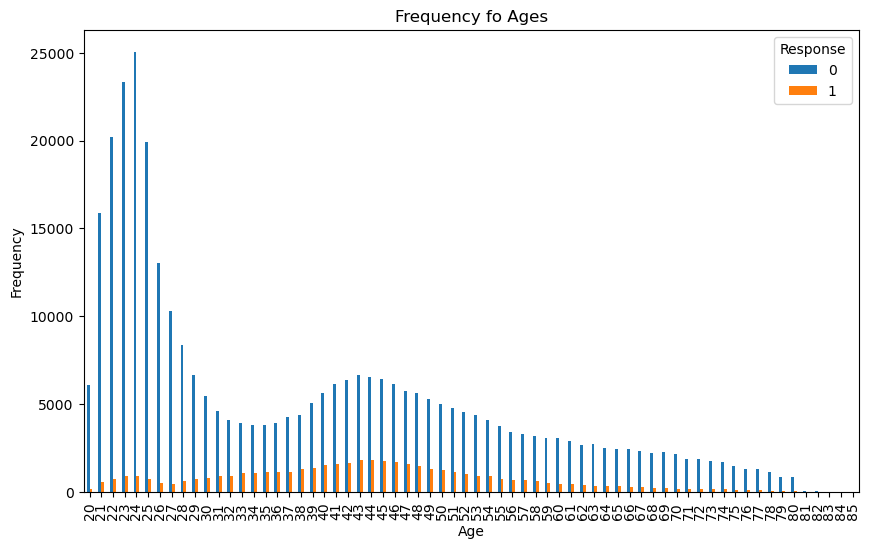

In [100]:
pd.crosstab(df.Age,df.Response).plot(kind = "bar",figsize = (10,6))
plt.title('Frequency fo Ages')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig('INSURANCE_and_ages.png')
plt.show()

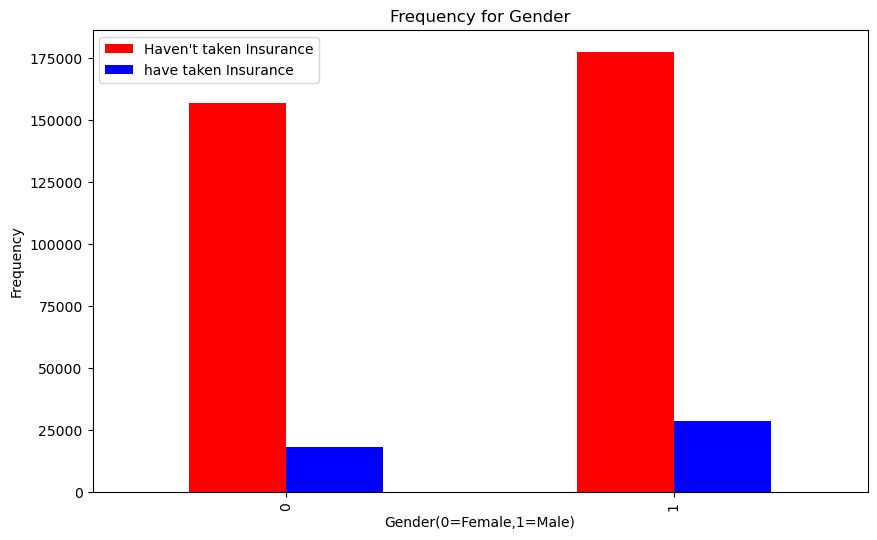

In [101]:
pd.crosstab(df.Gender,df.Response).plot(kind = "bar",figsize = (10,6), color = ['red','blue'])
plt.title('Frequency for Gender')
plt.xlabel("Gender(0=Female,1=Male)")
plt.legend(["Haven't taken Insurance","have taken Insurance"])
plt.ylabel("Frequency")
plt.savefig('Gender.png')
plt.show()

<h2> 5 Splitting the data into training data amd testing data

In [102]:
#21MID0031
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state = 2)

In [103]:
print(x.shape,x_train.shape,x_test.shape)


(381109, 11) (304887, 11) (76222, 11)


<h2> 6. Logistic Regression

In [104]:
#21MID0031
model = LogisticRegression()

In [105]:
model.fit(x_train,y_train)

LogisticRegression()

<h2> 7. Model Evaluation for Accuracy Score

In [106]:
#Accuracy on Training Data - 21MID0031
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print("Accuracy on Training Data :",training_data_accuracy)

Accuracy on Training Data : 0.8774365584626436


In [107]:
#Accuracy on Testing data - 21MID0031
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)
print("Accuracy on Testing Data :",testing_data_accuracy)

Accuracy on Testing Data : 0.8774369604576107


<h2> 8.Building a Predictive System

In [108]:
#21MID0031
import warnings
warnings.filterwarnings('ignore')
input_data = (1,1,44,1,28,0,2,40454,26,217,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0] == 0):
    print("The person didn't take an Insurance")
else:
    print("The person has taken an Insurance")

[1]
The person has taken an Insurance


In [109]:
#21MID0031
input_data = (4,1,21,1,11,1,0,0,28619,152,203)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0] == 0):
    print("The person didn't take an Insurance")
else:
    print("The person has taken an Insurance")

[0]
The person didn't take an Insurance
